# Inference and Visualization of UW-Madison Data


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
pd.options.plotting.backend = "plotly"
import random
from glob import glob
import os, shutil
from tqdm.notebook import tqdm
tqdm.pandas()
import time
import copy
import joblib
import gc
from IPython import display as ipd
from joblib import Parallel, delayed
from os.path import join

# visualization
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import image as mpimg
from matplotlib.patches import Rectangle

In [6]:
base_folder = '/mnt/d/code_medimg_aneja_lab'
image_and_mask_folder = join(base_folder, 'data_uwmadison_01c_preprocessed_3d_masked_and_padded_231022_185253_103_120_48')
predicted_folder = join(base_folder, 'test_results_231023_081118')

# Visualize

In [9]:
def load_3d(folder, case_day):    
    path = join(folder, f"{case_day}.npy")
    img = np.load(path, encoding='bytes')
    return img

def show_3d(image_and_expected_seg_folder, observed_seg_folder, case_day, num_wanted, scale, show_mask=True):

    image_folder = join(image_and_expected_seg_folder, "images")
    expected_seg_folder = join(image_and_expected_seg_folder, "masks")
    observed_seg_folder = observed_seg_folder
    
    image_3d = load_3d(image_folder, case_day)
    expected_3d = load_3d(expected_seg_folder, case_day)
    observed_3d = load_3d(observed_seg_folder, case_day)

    print(f"-------- {image_3d.shape} {expected_3d.shape} {observed_3d.shape} -----------")

    max_slice = image_3d.shape[2]
    if num_wanted== -1:
        num_wanted = max_slice + 1
    slices = [max_slice  * (sample_num + 1)  // (num_wanted+1) for sample_num in range(num_wanted)]
    # slices = [92] # zona
    print(f"slices {slices}")

    nrows = len(slices)
    ncols = 3
    plt.figure(1)
    fix, axs = plt.subplots(nrows, ncols, figsize=(ncols*scale, nrows*scale),
                            subplot_kw={'xticks': [], 'yticks': []})

    index = 0
    for slice in slices:

        index += 1
        plt.subplot(nrows, ncols, index)
        plt.title(f"Slice {slice}")

        image_2d = image_3d[:, :, slice]
        plt.imshow(image_2d,  interpolation='none', cmap='bone')
        # plt.imshow(image_2d)

        index += 1
        expected_2d = expected_3d[:, :, slice]
        counts, buckets = np.histogram(expected_2d, bins=256, range=(-0.5, 255.5))
        count_string = (f"noclass:{counts[0]}\n" +
                        f"a:{counts[1]} b:{counts[2]} c:{counts[4]}\n" +
                        f"ab:{counts[3]} ac:{counts[5]} bc:{counts[6]} abc:{counts[7]}")
        # mask_2d_normalized = mask_3d_normalized[:, :, slice]
        # print(np.histogram(mask_2d, bins=8, range=(-0.5, 7.5)))
        plt.subplot(nrows, ncols, index)
        plt.title(count_string, loc='left')
        plt.imshow(expected_2d, vmin=0, vmax=7, interpolation='none', cmap = plt.colormaps["nipy_spectral"])

        index += 1
        observed_2d = observed_3d[:, :, slice]
        counts, buckets = np.histogram(observed_2d, bins=256, range=(-0.5, 255.5))
        count_string = (f"noclass:{counts[0]}\n" +
                        f"a:{counts[1]} b:{counts[2]} c:{counts[4]}\n" +
                        f"ab:{counts[3]} ac:{counts[5]} bc:{counts[6]} abc:{counts[7]}")
        # mask_2d_normalized = mask_3d_normalized[:, :, slice]
        # print(np.histogram(mask_2d, bins=8, range=(-0.5, 7.5)))
        plt.subplot(nrows, ncols, index)
        plt.title(count_string, loc='left')
        plt.imshow(observed_2d, vmin=0, vmax=7, interpolation='none', cmap = plt.colormaps["nipy_spectral"])




-------- (103, 120, 48) (103, 120, 48) (103, 120, 48) -----------
slices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]


<Figure size 640x480 with 0 Axes>

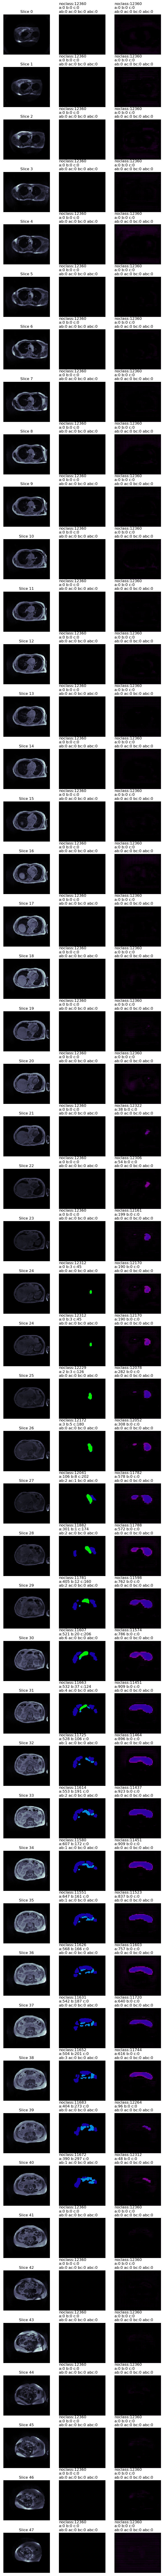

In [10]:
case_day = 'case_85_day_29'
show_3d(image_and_mask_folder, predicted_folder, case_day, num_wanted=-1, scale=3)